In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
# plt.rcParams["figure.figsize"] = 10,5
# plt.rcParams["font.size"] = 16
# plt.rcParams.update({"text.usetex": True,"font.family": "sans-serif","font.sans-serif": ["Helvetica"]})

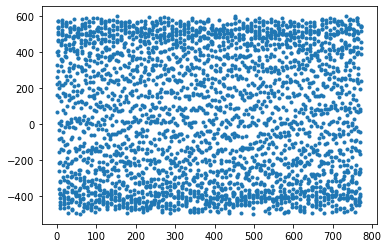

In [7]:
data = pd.read_csv("LP_raw.txt")

y = data.iloc[:,1]
dt  = 0.250 # 250ms
samplingFreq = 1/dt
t = np.arange(0,y.size)*0.25
order = 5
# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=dt); # the frequencies in cycles/s
rad_s = 5
freq = rad_s/(2*np.pi)
y_sim=[]

for i in range(len(t)):
    rand_factor = np.random.rand()*100
    y_sim.append(500*np.sin(2*np.pi*0.1*t[i])+rand_factor)

plt.plot(t,y_sim,".")


In [8]:
# Low-pass filter
cutoff_freq = 0.2
w0 = 2.0*np.pi*cutoff_freq; # pole frequency (rad/s)
num = w0**order       # transfer function numerator coefficients
den = [1,w0**order]    # transfer function denominator coefficients
lowPass = signal.TransferFunction(num,den) # Transfer function

discreteLowPass = lowPass.to_discrete(dt,method='bilinear')
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.28145702, 0.28145702]),
array([ 1.        , -0.43708596]),
dt: 0.25
)


In [9]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

Filter coefficients b_i: [0.28145702 0.28145702]
Filter coefficients a_i: [0.43708596]


Evaluate

<Figure size 432x288 with 0 Axes>

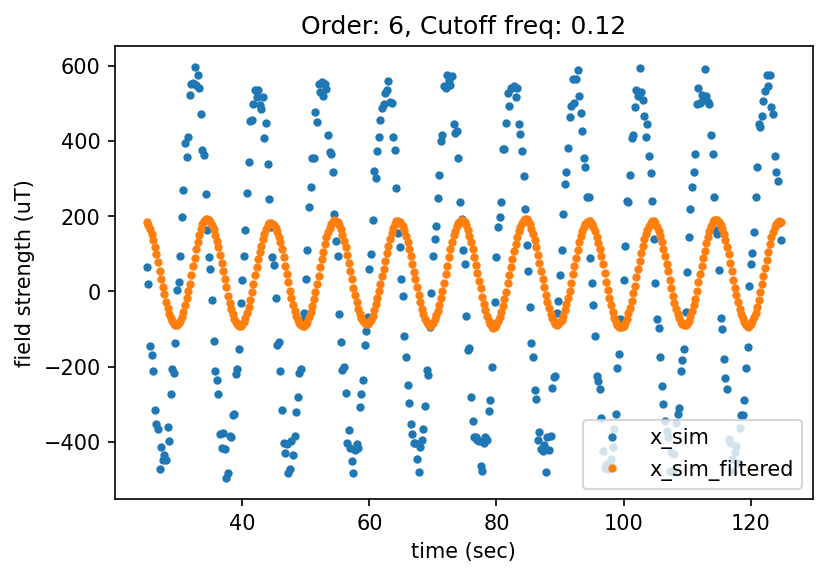

In [5]:
yfilt = np.zeros(len(y_sim))
for i in range(3,len(y_sim)):
    yfilt[i] = a[1]*yfilt[i-1] + b[0]*y_sim[i] + b[1]*y_sim[i-1]
plt.figure()
plt.figure(dpi=150)
range_a = 100
range_b = 500
plt.plot(t[range_a:range_b],y_sim[range_a:range_b],'.',label ="x_sim");
plt.plot(t[range_a:range_b],yfilt[range_a:range_b],'.',label ="x_sim_filtered");
plt.xlabel("time (sec)")
plt.ylabel("field strength (uT)")
plt.title("Order: "+str(order)+", Cutoff freq: "+ str(cutoff_freq))
plt.legend()
plt.show()
#plt.xlim([min(t),max(t)]);

# yfilthat = np.fft.fft(yfilt)
# fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)
#
# plt.figure()
# plt.plot(fcycles,np.absolute(yhat));
# plt.plot(fcycles,np.absolute(yfilthat));
# plt.xlim([-100,100]);
# plt.xlabel("$\omega$ (cycles/s)");
# plt.ylabel("$|\hat{y}|$");